In [2]:
import os
import sys
sys.path.append("..")
import phage_init

ModuleNotFoundError: No module named 'phage_init'

In [16]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std.p"), "rb" ) )

In [3]:
di_train     = train_X_total[:,0:400]
tri_train    = train_X_total[:,400:8400]
di_sc_train  = train_X_total[:,8400:8449] 
tri_sc_train = train_X_total[:,8449:8792]
tt_train     = train_X_total[:,8792:]

In [4]:
di_test     = test_X_total[:,0:400]
tri_test    = test_X_total[:,400:8400]
di_sc_test  = test_X_total[:,8400:8449] 
tri_sc_test = test_X_total[:,8449:8792]
tt_test     = test_X_total[:,8792:]

In [5]:
mean_di     = mean_total[0:400]
mean_tri    = mean_total[400:8400]
mean_di_sc  = mean_total[8400:8449] 
mean_tri_sc = mean_total[8449:8792]
mean_tt     = mean_total[8792:]

In [6]:
std_di     = std_total[0:400]
std_tri    = std_total[400:8400]
std_di_sc  = std_total[8400:8449] 
std_tri_sc = std_total[8449:8792]
std_tt     = std_total[8792:]

In [15]:
di_train.shape

(25000, 400)

In [8]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [17]:
#train_X =numpy.concatenate(di_train)
#test_Y  =numpy.concatenate(di_test)
train_X=di_train
test_X=di_test

In [11]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6362141925019353944
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15595618304
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9223201043416147410
physical_device_desc: "device: 0, name: Tesla V100-SXM2-16GB, pci bus id: 0000:00:1e.0, compute capability: 7.0"
]


In [20]:
f_num=train_X.shape[1]


In [21]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.007, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               80200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [22]:
model.fit(train_X, train_Y, epochs=200,verbose=1, batch_size=200)

Epoch 1/200
25000/25000 [==============================] - 2s 71us/step - loss: 1.0286 - acc: 0.6712
Epoch 2/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.7078 - acc: 0.7672
Epoch 3/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.6256 - acc: 0.7880
Epoch 4/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5774 - acc: 0.8000
Epoch 5/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5608 - acc: 0.8114
Epoch 6/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5356 - acc: 0.8142
Epoch 7/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5103 - acc: 0.8238
Epoch 8/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5084 - acc: 0.8234
Epoch 9/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.4956 - acc: 0.8267
Epoch 10/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.4779 - a

25000/25000 [==============================] - 1s 21us/step - loss: 0.5488 - acc: 0.8379
Epoch 161/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5655 - acc: 0.8314
Epoch 162/200
25000/25000 [==============================] - 1s 20us/step - loss: 0.5260 - acc: 0.8368
Epoch 163/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5177 - acc: 0.8383
Epoch 164/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5393 - acc: 0.8337
Epoch 165/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5504 - acc: 0.8371
Epoch 166/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5259 - acc: 0.8368
Epoch 167/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5279 - acc: 0.8380
Epoch 168/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.5537 - acc: 0.8362
Epoch 169/200
25000/25000 [==============================] - 1s 21us/step - loss: 0.530

In [23]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

675/675 [==============================] - 0s 125us/step
Accuracy: 77.78%


In [24]:
#you can save the as a file so you dont have to train it every time
model.save( os.path.join(phage_init.model_dir,'di_model.h5'))

In [25]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.92      0.78      0.85        93
     Minor capsid       0.75      0.87      0.80        52
        Baseplate       0.63      0.89      0.74       103
       Major tail       0.91      0.74      0.82        54
       Minor tail       0.96      0.75      0.84        36
           Portal       0.87      0.75      0.81        73
       Tail fiber       0.65      0.49      0.56        87
       Tail shaft       0.80      0.67      0.73        48
           Collar       0.61      0.88      0.72        49
Head-Tail joining       0.97      0.94      0.96        80

      avg / total       0.80      0.78      0.78       675



In [26]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({2: 103, 0: 93, 6: 87, 9: 80, 5: 73, 3: 54, 1: 52, 8: 49, 7: 48, 4: 36})
[93, 52, 103, 54, 36, 73, 87, 48, 49, 80]



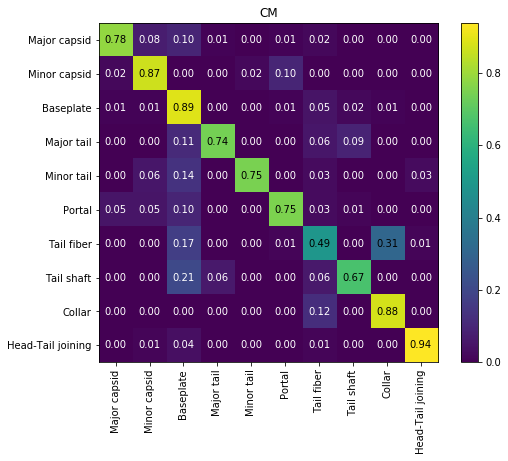

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")